# Explanatory Analysis on Prosper Loan
## by Ibeh Chidera


## Investigation Overview
In this Analysis, I wanted to determine the chances that a Borrower has to get a Loan with favorable loan conditions. The main focus was LoanOriginalAmount, IncomeRange, BorrowerRate, Debt-to-Income Ratio and LoanStatus.


## Dataset Overview

The dataset consisted of 113,937 rows with 81 columns on each loan, including loan amount, borrower rate, current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.¶

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_clean = pd.read_csv('ProsperLoanData_cleaned.csv')
prosper_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
Unnamed: 0             113937 non-null int64
Term                   113937 non-null int64
LoanStatus             113937 non-null object
BorrowerRate           113937 non-null float64
Occupation             110349 non-null object
EmploymentStatus       111682 non-null object
DebtToIncomeRatio      105383 non-null float64
IncomeRange            113937 non-null object
StatedMonthlyIncome    113937 non-null float64
LoanOriginalAmount     113937 non-null int64
Recommendations        113937 non-null int64
Investors              113937 non-null int64
Year                   113937 non-null int64
ListingCategory        113937 non-null object
dtypes: float64(3), int64(6), object(5)
memory usage: 12.2+ MB


## Loan Amount Distribution

The Amount of Loan granted to Borrowers,  the distribution is Trimodal with majority of loan amount given out at 4,000 , 10,000 and 15,0000 dollars.

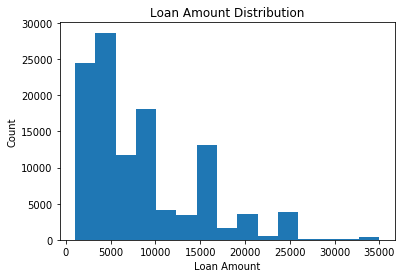

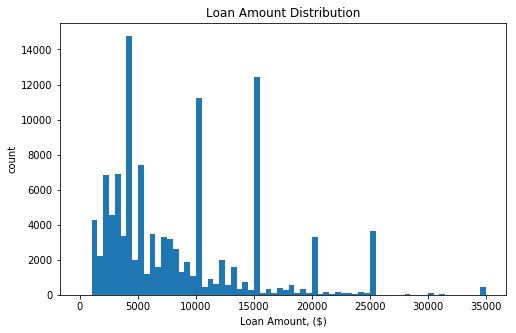

In [3]:
#The origination amount of the loan
plt.hist(data = prosper_clean, x = 'LoanOriginalAmount', bins = 15)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Loan Amount Distribution');

binsize = 500
bins = np.arange(0, prosper_clean['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount, ($)')
plt.ylabel('count')
plt.title('Loan Amount Distribution');
plt.show()

## Borrower's Rate Distribution 

The Borrower's interest rate for each loan tend to peak between 10% and 20% and gradually declines, but there is an outliers around 32% rate.

In [4]:
prosper_clean['BorrowerRate'] = prosper_clean['BorrowerRate']*100

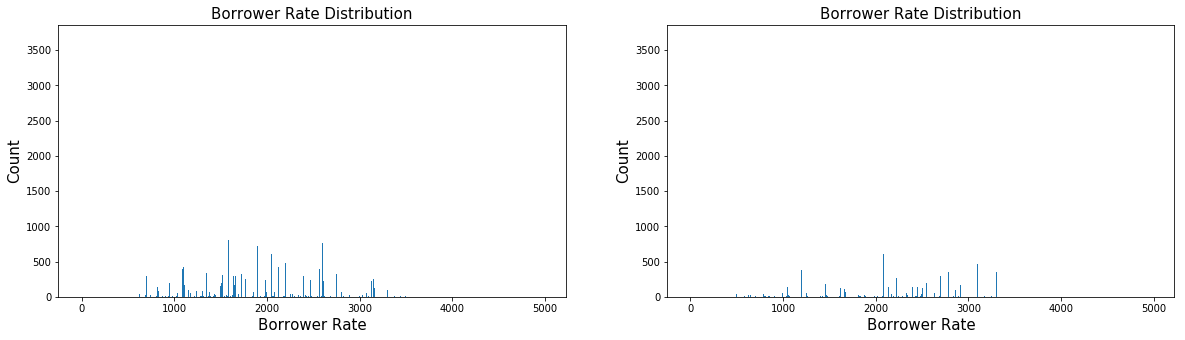

In [5]:

plt.figure(figsize = [20,5])
def subplot(x, xlabel, ylabel, title):
    'Creates a histplot by passing in the required parameters'
    # Set xlabel, ylabel and title:
    plt.xlabel(xlabel,size=15)
    plt.ylabel(ylabel, size=15)
    plt.title(title, size=15)
    
plt.subplot(1,2,1)
bin_vals = np.arange(0, prosper_clean['BorrowerRate'].max(), 1)
hist1 = plt.hist(data = prosper_clean, x = 'BorrowerRate', bins = bin_vals);
subplot(hist1, 'Borrower Rate', 'Count', 'Borrower Rate Distribution')

plt.subplot(1,2,2)
bin_vals = np.arange(-0.5, prosper_clean['BorrowerRate'].max()+1.5, 1)
hist2 = plt.hist(data = prosper_clean, x = 'BorrowerRate', bins = bin_vals, rwidth = 0.7)
subplot(hist1, 'Borrower Rate', 'Count', 'Borrower Rate Distribution');

## Loan Amount Allocation by Employment Status

It shows that Employed borrowers gets more Loan amount granted, followed by Full-Time workers. 

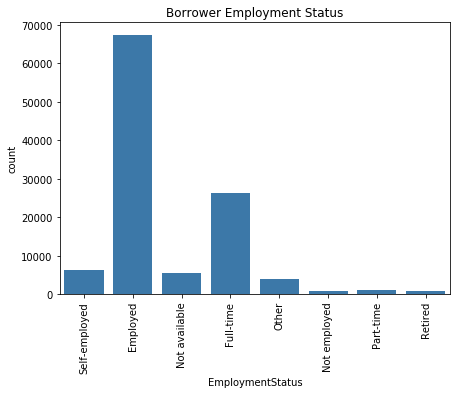

In [6]:
plt.figure(figsize=[7, 5])
base_color = sb.color_palette("Blues")[4]
sb.countplot(data=prosper_clean, x='EmploymentStatus', color = base_color);
plt.xticks(rotation=90);
plt.title('Borrower Employment Status');

## BorrowerRate Effect on Loan Amount

A weak negative correlation is observed indicating that as the Loan Amount increases, the borrower's rate reduces.

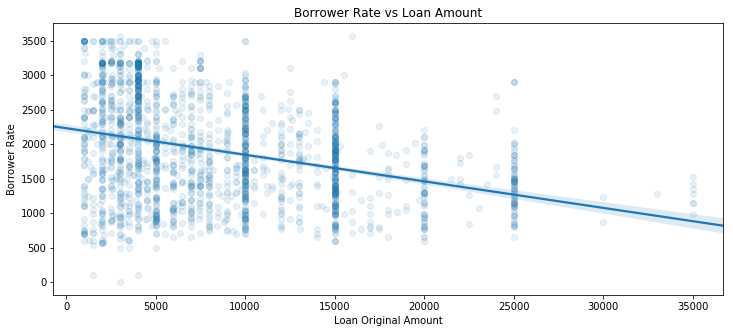

In [7]:
np.random.seed(0)
sample = np.random.choice(prosper_clean.shape[0], 2000, replace = False)
prosper_clean_subset = prosper_clean.reindex(sample)

plt.figure(figsize =(12,5))
sb.regplot(data = prosper_clean_subset, x='LoanOriginalAmount', 
            y= 'BorrowerRate',  scatter_kws = {'alpha' : 0.1}, y_jitter = 0.1)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate vs Loan Amount');

## Income Range Effect on BorrowerRate
This shows that Borrowers with high income has a higher chance of getting their loan approved with low Borrower rate.

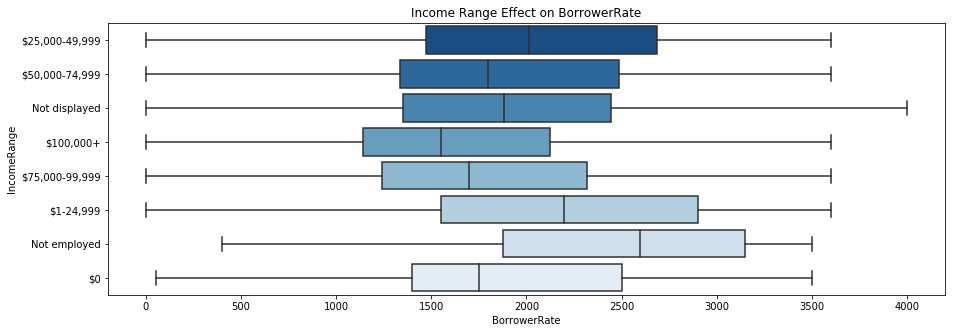

In [8]:
plt.figure(figsize = [15, 5])

base_color = sb.color_palette()[0]
sb.boxplot(data = prosper_clean, y = 'IncomeRange', x = 'BorrowerRate', palette = "Blues_r", showfliers = False)
plt.title('Income Range Effect on BorrowerRate');

## Income Range effect on Loan Amount and Borrower Rate
The lowest Borrower Rate with the highest Loan Amount has the Income Range of $100,000+, while the Highest Borrower Rate with Low Loan Amount has the Income Range of Not displayed.

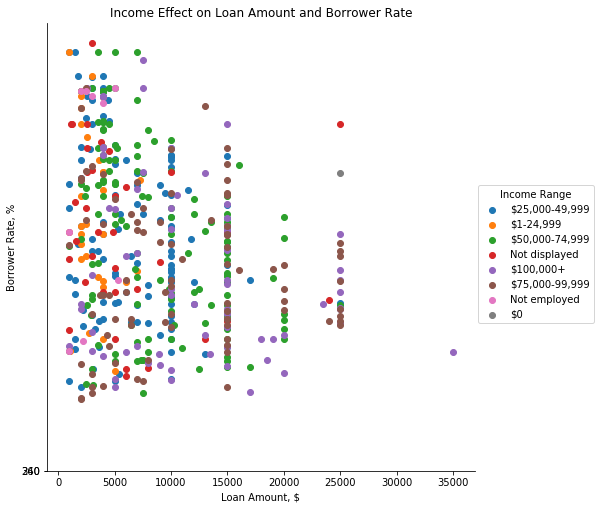

In [9]:
np.random.seed(5)
sample = np.random.choice(prosper_clean.shape[0], 500, replace = False)
prosper_clean_subset = prosper_clean.reindex(sample)

plt.figure(figsize = [30,20])
g = sb.FacetGrid(data = prosper_clean_subset, hue = 'IncomeRange', size = 7);
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');
tick_props = np.arange(0.60, 1.05, 0.30)
tick_names = ['{:0.0f}'.format(v*400) for v in tick_props]
plt.yticks(tick_props, tick_names)
plt.xlabel('Loan Amount, $')
plt.ylabel('Borrower Rate, %')
plt.title('Income Effect on Loan Amount and Borrower Rate')
g.add_legend(title = 'Income Range');

## Insight

A Borrower who is Employed with a professional occupation like a Dentist or pilot earning a High Income will get a High Loan Amount, with low Borrower Rate.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 532171 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/